In [83]:
import pandas as pd
import json
import re

In [84]:
# lets transform the data into a pandas dataframe, currently it is stored in a dictionary of k=str, v=list[str]
# we will use the json module to load the data from the json file
with open('data_chan.json', 'r') as f:
    data = json.load(f)

# Create a pandas dataframe with 2 title and comment columns
df = pd.DataFrame(columns=['title', 'comment'])

# Iterate through the dictionary and append the data to the dataframe
for title, comments in data.items():
    for comment in comments:
        df = df.append({'title': title, 'comment': comment}, ignore_index=True)

In [85]:
df.head()

,title,comment
0,All the cool kids are doing it.,&gt;&gt;400714173&gt;no pepe what are you doin...
1,All the cool kids are doing it.,&gt;&gt;400708757https://www.youtube.com/watch...
2,All the cool kids are doing it.,&gt;&gt;400713918&gt;if you don&#039;t like th...
3,All the cool kids are doing it.,&gt;&gt;400708823And I wonder how many big ole...
4,All the cool kids are doing it.,&gt;&gt;400714594Vatniggers get into the meat ...


In [86]:
# lets make some preeliminary analysis on the data with spacy
import spacy
nlp = spacy.load('en_core_web_md')

In [87]:
# clean the text from 'title' and 'comment' columns
def clean_text(text):
    # make everything lowercase
    text = text.lower()
    # only lowercase letters no numbers or special characters
    text = re.sub(r'[^a-z]', ' ', text)
    doc = nlp(text)
    return ' '.join([token.lemma_ for token in doc if not token.is_stop and not token.is_punct and not token.like_num and 'gt' not in token.text])

In [88]:
# apply the clean_text function to the dataframe
df['title'] = df['title'].apply(clean_text)
df['comment'] = df['comment'].apply(clean_text)

In [89]:
# lets create a new column with the spacy doc object
df['doc'] = df['comment'].apply(lambda x: nlp(x))

In [90]:
# lets create a new column with the length of the comment
df['length'] = df['doc'].apply(lambda x: len(x))

In [91]:
# lets analyze the sentiment of the comments
from spacytextblob.spacytextblob import SpacyTextBlob
nlp.add_pipe('spacytextblob')

In [92]:
# lets create a new column with the sentiment of the comment
df['sentiment'] = df['doc'].apply(lambda x: nlp(x)._.blob.polarity)

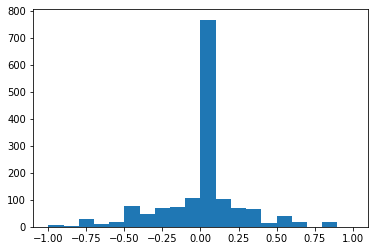

In [93]:
# lets plot the sentiment of the comments
import matplotlib.pyplot as plt

plt.hist(df['sentiment'], bins=20)
plt.show()

In [94]:
# show 5 samples of negative comments, in which sentiment is less than -0.5
df[df['sentiment'] < -0.5].sample(5)

,title,comment,doc,length,sentiment
108,queenno pmabout wipe map ivan,argentina relate thread s ...,"( , argentina, relate, thread, ...",20,-0.800
368,look plaster,u mad bro,"( , u, mad, bro)",4,-0.625
1313,canadians obedient government like m i...,canada base superpower martha ke...,"( , canada, base, superpower, mar...",11,-0.800
1270,big happen right fucking brazilian fed send ...,world like base brazilbro,"( , world, , like, base, brazil...",6,-0.800
565,https youtu qsui n zgnghttps youtu ufvs ...,wtf hate hitler,"( , wtf, hate, hitler, )",5,-0.650


In [95]:
# show 5 samples of positive comments, in which sentiment is greater than 0.5
df[df['sentiment'] > 0.5].sample(5)

,title,comment,doc,length,sentiment
415,pm queens die day ruin economy fuck little m...,let s drink boris win,"( , let, , s, drink, bori...",7,0.800000
891,european hypocrite,lol,"( , lol)",2,0.800000
914,boris johnson mp nomination claim bac...,boris come hope learn lesson win...,"( , boris, come, hope, learn, les...",12,0.800000
1408,quot ross mtangi trading executive credi...,lol fat fur mommy therapist good...,"( , lol, fat, fur, mommy, therapi...",8,0.666667
1215,spoonfeed ll cuck world shit world d...,great reset codeword ethnostate ...,"( , great, reset, codeword, ethno...",9,0.800000


In [96]:
# lets create a new column with the subjectivity of the comment
df['subjectivity'] = df['doc'].apply(lambda x: nlp(x)._.blob.subjectivity)

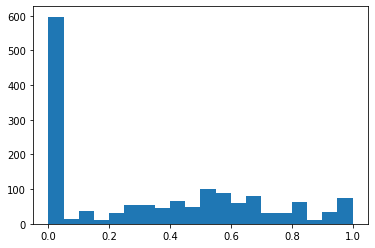

In [97]:
# lets plot the subjectivity of the comments
plt.hist(df['subjectivity'], bins=20)
plt.show()

In [98]:
# show 5 samples of subjective comments, in which subjectivity is greater than 0.5
df[df['subjectivity'] > 0.5].sample(5)

,title,comment,doc,length,sentiment,subjectivity
218,thank edict milan pagans christians live rom...,religion doomedye dude ...,"( , religion, doomedye, dude, ...",11,0.500000,0.888889
903,replace u hhhh,mixed mulatto friend fuck head got stab rud...,"(mixed, mulatto, friend, , fuck, head, got,...",14,-0.225000,0.562500
885,troon suicide watch,fucking beggar terf mobili...,"( , fucking, beggar, terf, ...",28,-0.055556,0.611111
1429,onion wojak,great work anon,"(great, work, anon)",3,0.800000,0.750000
959,accept apology,death entire family,"( , death, entire, family)",4,0.000000,0.625000


In [99]:
# show 5 samples of objective comments, in which subjectivity is less than 0.5
df[df['subjectivity'] < 0.5].sample(5)

,title,comment,doc,length,sentiment,subjectivity
34,previous timeline tug http...,protect sa law nigger ac...,"( , protect, sa, law, , n...",15,0.0,0.2375
507,don t want scandinavian fuck htt...,sniff bwc got reject,"( , sniff, bwc, got, reject)",5,0.0,0.0000
1503,future look like pol dig archive century ...,commiblock tv screen display nat...,"( , commiblock, tv, screen, displ...",8,0.0,0.0000
527,extreme bigotry prejudice fuel ultra nationa...,grind minority group oh don t act u,"( , grind, minority, group, oh, , don, ...",11,0.0,0.0000
131,kill go end,hart celler act want pass hart ...,"( , hart, celler, act, want, pas...",16,0.0,0.0000


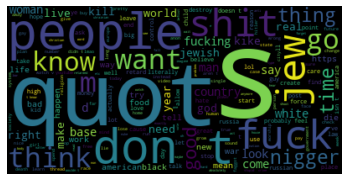

<Figure size 1440x720 with 0 Axes>

In [100]:
# lets create a word cloud of the most common words in the comments
from wordcloud import WordCloud

# create a string of all the comments
all_comments = ' '.join(df['comment'])

# create a word cloud object
wordcloud = WordCloud().generate(all_comments)

# plot the word cloud, make it larger
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.figure(figsize=(20,10))
plt.show()

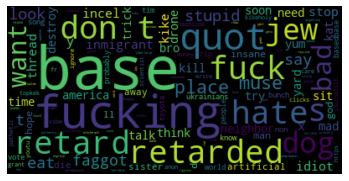

<Figure size 1440x720 with 0 Axes>

In [101]:
# lets create a word cloud of the most common words in the comments, but only for negative comments
negative_comments = ' '.join(df[df['sentiment'] < -0.5]['comment'])

# create a word cloud object
wordcloud = WordCloud().generate(negative_comments)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.figure(figsize=(20,10))
plt.show()

In [102]:
# check how many unique words are in the comments
total_unique = len(set(all_comments.split()))

# average unique words per comment
unique_words_by_comment = len(set(all_comments.split())) / len(all_comments.split())